# Solving Linear Systems and Differential Equations

## Solving Linear Systems via Iterative Methods
Consider the following linear system,

$$\begin{align}
3x_1 - 4x_2 &= -1 \\
x_1 + 2x_2 &= 3
\end{align}$$

This linear system can be represented in a matrix form as followed,

$$\begin{bmatrix}3 & -4 \\ 1 & 2\end{bmatrix} 
\cdot \begin{bmatrix}x_1 \\ x_2\end{bmatrix}
= \begin{bmatrix}-1 \\ 3\end{bmatrix}$$

Now, this linear system can be solved using either Jacobi interation or Gauss-Seidel method. We'll begin with Jacobi iteration. Let's say that the iteration begins with $x = 0$. The linear system can be solved by iteratively updating $x$ via following recurrence,

$$x_{i + 1} = x_i - M^{-1} (Ax_i - b)$$

where $M^{-1} = \begin{bmatrix}\frac{1}{3} & 0 \\ 0 & \frac{1}{2}\end{bmatrix}$, $A = \begin{bmatrix}3 & -4 \\ 1 & 2\end{bmatrix}$, and $b = \begin{bmatrix}-1 \\ 3\end{bmatrix}$.

In [39]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

x =
[[ 1.]
 [ 1.]]
Ax =
[[-1.]
 [ 3.]]


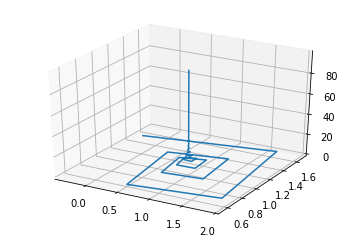

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

A = np.array([[3, -4], [1, 2]])
b = np.array([[-1], [3]])
x = np.array([[0], [0]]) # initialized as 0
M_inv = np.linalg.inv(np.diag(np.diag(A)))
n = 100 # number of iterations

x1 = []
x2 = []
for i in range(n):
    x = x - M_inv.dot(A.dot(x) - b)
    x1.append(x[0][0])
    x2.append(x[1][0])
    
ax.plot(x1, x2, np.arange(n))

print("x =")
print(x)
print("Ax =")
print(A.dot(x))

We can now define Jacobi iteration function, so that we can use it to solve differential equations.

In [33]:
def jacobi(A, x, b, n):
    """ Solve the argument linear system via Jacobi iteration. """
    M_inv = np.linalg.inv(np.diag(np.diag(A)))        
    for i in range(n):
        x = x - M_inv.dot(A.dot(x) - b)
    err = A.dot(x) - b
    return x, err

Just for fun, we'll try solving the same linear system with a different iterative method called Gauss-Seidel method. Gauss-Seidel uses the following recurrence for updating the solution:

$$x_{i + 1} = L_*^{-1}(b - Ux_i)$$

where $L_*$ is the lower triangular component of $A$, and $U$ its strictly upper triangular component.

x =
[[ 1.]
 [ 1.]]
Ax =
[[-1.]
 [ 3.]]


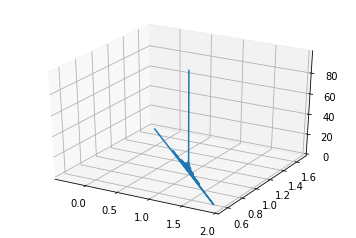

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

A = np.array([[3, -4], [1, 2]])
b = np.array([[-1], [3]])
x = np.array([[0], [0]]) # initialized as 0
L_inv = np.linalg.inv(np.tril(A))
U = np.triu(A, 1)

x1 = []
x2 = []
for i in range(100):
    x = L_inv.dot(b - U.dot(x))
    x1.append(x[0][0])
    x2.append(x[1][0])

ax.plot(x1, x2, np.arange(n))

print("x =")
print(x)
print("Ax =")
print(A.dot(x))

## Ordinary Differential Equation (ODE)

Consider the following ordinary differential equation,
$$\frac{\delta y}{\delta x} = y * sin(x)$$
with its initial condition $y(0) = 1$ in the interval $0 < x < 2$. If we replace $\frac{\delta y}{\delta x}$ with its backward-Euler approximation,
$$\frac{y(x) - y(x - h)}{h} = y * sin(x)$$

In [2]:
def backward_euler(f, x, h=0.1):
    """ Compute the derivative of f via backward-Euler approximation. """
    return (f(x) - f(x - h)) / h

## Partial Differential Equation (PDE)

In [1]:
def dx(f, x, y, h=1e-8):
    """ Return the partial derivative of f with respect to x. """
    return (f(x, y) - f(x - h, y)) / h

def dy(f, x, y, h=1e-8):
    """ Return the partial derivative of f with respect to y. """
    return (f(x, y) - f(x, y - h)) / h


SyntaxError: unexpected EOF while parsing (<ipython-input-1-82047b2ab106>, line 2)